# Install Required packages

In [84]:
!pip install pandas scikit-learn textblob matplotlib seaborn
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


# Import Libraries

In [85]:
import pandas as pd
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the Dataset

In [86]:
df = pd.read_csv("data_analysis.csv")  # Update the path as needed
print("Data loaded successfully! Shape:", df.shape)

Data loaded successfully! Shape: (39116, 36)


<ipython-input-86-de9b4101bb75>:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data_analysis.csv")  # Update the path as needed


In [87]:
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1406397735792791556,1406397735792791556,2021-06-20 05:15:24 IST,2021-06-20,05:15:24,530,16001827,spj_tweets,Society of Professional Journalists,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1406057066058313733,1406057066058313733,2021-06-19 06:41:42 IST,2021-06-19,06:41:42,530,1067308099,coastguardph,Philippine Coast Guard,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1405965100993986561,1405965100993986561,2021-06-19 00:36:16 IST,2021-06-19,00:36:16,530,167406704,yaelkohen,Yael Kohen,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1405935463374991366,1405935461042958338,2021-06-18 22:38:30 IST,2021-06-18,22:38:30,530,29206490,ieeeusa,IEEE-USA,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1405918849329991694,1405918849329991694,2021-06-18 21:32:29 IST,2021-06-18,21:32:29,530,31696962,dw_europe,DW Europe,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [88]:
df.tail()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
39111,7443517384,7443517384,2010-01-06 20:45:45 IST,2010-01-06,20:45:45,530,44374617,washpostjobs,Washington Post Jobs,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
39112,7426790266,7426790266,2010-01-06 08:40:39 IST,2010-01-06,08:40:39,530,6003222,solano,Víctor @Solano Franco,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
39113,7416161173,7416161173,2010-01-06 03:04:30 IST,2010-01-06,03:04:30,530,27221778,jennpozner,Jennifer L. Pozner,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
39114,7285952223,7285952223,2010-01-02 07:31:05 IST,2010-01-02,07:31:05,530,1147491,cocoy,Cocoy Dayao,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
39115,7274159499,7274159499,2010-01-01 23:11:04 IST,2010-01-01,23:11:04,530,30318595,project,Microsoft Project,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               39116 non-null  int64  
 1   conversation_id  39116 non-null  int64  
 2   created_at       39116 non-null  object 
 3   date             39116 non-null  object 
 4   time             39116 non-null  object 
 5   timezone         39116 non-null  int64  
 6   user_id          39116 non-null  int64  
 7   username         39116 non-null  object 
 8   name             39116 non-null  object 
 9   place            92 non-null     object 
 10  tweet            39116 non-null  object 
 11  language         39116 non-null  object 
 12  mentions         39116 non-null  object 
 13  urls             39116 non-null  object 
 14  photos           39116 non-null  object 
 15  replies_count    39116 non-null  int64  
 16  retweets_count   39116 non-null  int64  
 17  likes_count 

In [90]:
df.describe()

,id,conversation_id,timezone,user_id,replies_count,retweets_count,likes_count,video,near,geo,source,user_rt_id,user_rt,retweet_id,retweet_date,translate,trans_src,trans_dest
count,3.911600e+04,3.911600e+04,39116.0,3.911600e+04,39116.000000,39116.000000,39116.000000,39116.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,8.529895e+17,8.528658e+17,530.0,3.371448e+16,1.173177,6.816367,17.193936,0.284845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.753083e+17,3.752712e+17,0.0,1.677657e+17,17.406322,82.008708,325.298354,0.451346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7.274159e+09,7.274159e+09,530.0,5.700000e+01,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,5.634323e+17,5.633892e+17,530.0,1.888285e+07,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,9.230327e+17,9.227345e+17,530.0,6.899645e+07,0.000000,1.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.170864e+18,1.170734e+18,530.0,3.269122e+08,1.000000,3.000000,6.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.406398e+18,1.406398e+18,530.0,1.364614e+18,2319.000000,12617.000000,57425.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Describing Columns

In [91]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [92]:
df = df[['tweet']]

In [93]:
df

,tweet
0,Join @SPJ_IC at 6 p.m. EDT Tuesday for the nex...
1,"READ: Resilience, hard work, and perseverance ..."
2,How will the shift to streaming impact movie-m...
3,(2/2) to gain the aptitude to find better solu...
4,Alexander Lukashenko is still in power in Bela...
...,...
39111,#Hiring a Research-Data Analysis Intern in Was...
39112,[Interesante] 'The Cooperative Association for...
39113,Fellow writers: ever feel like ur head is so o...
39114,RT @newsycombinator: How to speed up massive d...


# Checking Null values

In [94]:
df.isnull().sum()

,0
tweet,0


# Cleaning the tweet Column before training model

In [95]:
def clean_text(text):
    text = re.sub(r"http\S+|www.\S+", "", text)      # Remove URLs
    text = re.sub(r"@\w+", "", text)                 # Remove mentions
    text = re.sub(r"#", "", text)                    # Remove # but keep hashtag words
    text = re.sub(r"[^a-zA-Z\s]", "", text)          # Remove special characters & numbers
    text = re.sub(r"\s+", " ", text)                 # Replace multiple spaces with single space
    return text.lower().strip()                      # Convert to lowercase and strip spaces

In [96]:
# Apply cleaning function
df['clean_tweet'] = df['tweet'].astype(str).apply(clean_text)

In [116]:
# Check a sample
print(df[['clean_tweet']].head())

                                         clean_tweet
0  join at pm edt tuesday for the next ictalk wit...
1  read resilience hard work and perseverance pai...
2  how will the shift to streaming impact moviema...
3  to gain the aptitude to find better solutions ...
4  alexander lukashenko is still in power in bela...


In [107]:
df.isnull().sum()

,0
tweet,0
clean_tweet,0
sentiment,0


# Sentiment labeling using TextBlob

In [108]:
def get_sentiment(text):
    try:
        polarity = TextBlob(text).sentiment.polarity
        return 'positive' if polarity > 0 else 'negative'
    except:
        return 'negative'

df['sentiment'] = df['clean_tweet'].astype(str).apply(get_sentiment)

# Spliting the dataset

In [109]:
X = df['clean_tweet']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorization using TF-IDF

In [110]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a Logistic Regression model

In [111]:
model = LogisticRegression()
model.fit(X_train_vec, y_train)

LogisticRegression()

# Predict and evaluate

In [112]:
y_pred = model.predict(X_test_vec)

# Accuracy

In [113]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")


Model Accuracy: 0.9241


# Classification report

In [114]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.94      0.92      3792
    positive       0.94      0.91      0.92      4032

    accuracy                           0.92      7824
   macro avg       0.92      0.92      0.92      7824
weighted avg       0.92      0.92      0.92      7824



# Confusion matrix

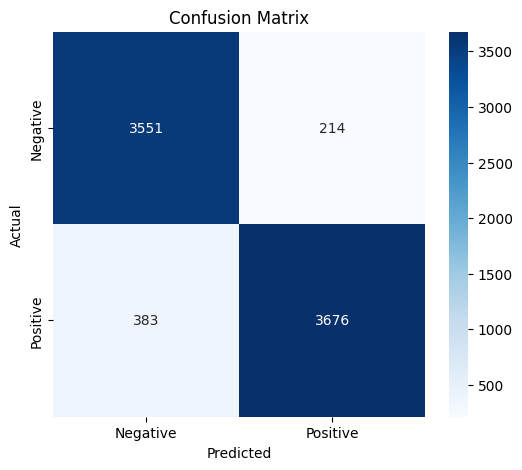

In [105]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [118]:
# Display tweets with their sentiment classification
for i in range(10):  # Display first 10 tweets
    tweet = df['tweet'].iloc[i]
    analysis = TextBlob(tweet)
    sentiment = 'Positive' if analysis.sentiment.polarity >= 0 else 'Negative'
    print(f"Tweet: {tweet}\nSentiment: {sentiment}\n{'-'*50}")


Tweet: Join @SPJ_IC at 6 p.m. EDT Tuesday for the next #ICTalk with @chrismattmann, who created the code behind The Panama Papers. He'll talk about how his skills in information retrieval and data analysis lead to the breaking the Panama Papers scandal.  https://t.co/teZJLcDIiW  https://t.co/izurOit5OL
Sentiment: Negative
--------------------------------------------------
Tweet: READ: Resilience, hard work, and perseverance paid off for Genison Basilio, who finished his Operations Research and Data Analysis course with flying colors at the United States Coast Guard Academy (USCGA).
Sentiment: Negative
--------------------------------------------------
Tweet: How will the shift to streaming impact movie-making? An interesting data analysis on something I’ve wondered about.  https://t.co/Lk9pejBmwW
Sentiment: Positive
--------------------------------------------------
Tweet: (2/2) to gain the aptitude to find better solutions to real-world #challenges.  Facebook livestream:  https://t.co